# Milestone

## Day 4

Download the data set about Value of Energy Cost Saving Program for businesses in New York City (under the "Export" option, there is a way to retrieve a CSV file). Answer the following questions.

How many different companies are represented in the data set?  787

What is the total number of jobs created for businesses in Queens?

How many different unique email domains names are there in the data set?

Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

Save your result for the previous question as a CSV file.

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Exploration

In [3]:
data=pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv')

In [39]:
pd.set_option('display.max_columns', None)

In [41]:
data.head(20)

,Period,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Gas Savings,Cogen savings,Electric Savings,Borough,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,FY2018,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,Limousine Service,ICIP,125.0,NaN,NaN,04/07/2008,8314.92,123975.24,NaN,NaN,NaN,QUEENS,40.745706,-73.929565,402.0,26.0,4003160.0,4.002220e+09,17902.0,QN0202
1,FY2018,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,Dist. of prepacked salads,ICIP,6.0,NaN,NaN,12/08/2009,6010.71,47512.89,NaN,NaN,NaN,STATEN IS,40.632845,-74.151048,501.0,49.0,5146740.0,5.011610e+09,239.0,SI0107
2,FY2018,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,Electrical Parts Mfg.,ICIP,35.0,NaN,NaN,03/04/2011,2946.05,21322.89,NaN,NaN,NaN,QUEENS,40.785144,-73.844833,407.0,19.0,4098344.0,4.040850e+09,929.0,QN0701
3,FY2018,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,Commercial Storage facility,ICIP,9.0,NaN,NaN,11/06/2015,48981.51,105016.49,NaN,NaN,NaN,BROOKLYN,40.673106,-74.002300,306.0,38.0,3336622.0,3.005720e+09,5302.0,BK0601
4,FY2018,"21st Century Optics, Inc.",Ralph Woythaler,rwoythaler@21st centuryoptics.com,7183922310,47-00 33rd Street,Lond Island City,NY,11101,Manufacturing,Eye glasses,Tenant,130.0,NaN,NaN,01/07/2009,36400.37,215757.20,NaN,NaN,NaN,QUEENS,40.742386,-73.932148,402.0,26.0,4003447.0,4.002520e+09,19901.0,QN0202
5,FY2018,221 WEST 26TH STREET CORP.,Eric Duke,eduke@amvchelsea.com,2127271234,221 WEST 26TH STREET,New York,NY,10001,Manufacturing,FILM & VIDEO PRODUCTION,ICIP,120.0,NaN,240.0,12/14/2004,13582.13,964718.70,NaN,NaN,NaN,MANHATTAN,40.746479,-73.995359,105.0,3.0,1014235.0,1.007760e+09,95.0,MN0501
6,FY2018,"24-60 47TH STREET, LLC",CHRISTINE MOONEY,NaN,2128222236,24.60 47TH STREET,Queens,NY,11103,Manufacturing,MFG RESTORER RESTORER,ICIP,44.0,NaN,44.0,09/08/2004,989.10,122798.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,FY2018,2840 Atlantic Avenue Realty Corp,Donald Marchese,Edgeinc@hotmail.com,7186477500,2840 Atlantic Avenue,Brooklyn,NY,11207,Commercial,Real estate holding company,ICIP,30.0,NaN,NaN,06/16/2008,1428.61,105702.57,NaN,NaN,NaN,BROOKLYN,40.676789,-73.889346,305.0,37.0,3428817.0,3.039640e+09,1198.0,BK0502
8,FY2018,33RD STREET BAKERY INC. DBA PQ SOHO,Joseph Castellane,jcastellane@pqus.com,2123599000,43-32 33RD STREET,Long Island City,NY,11101,Manufacturing,WHSLR. BREADS & PASTRY,ICIP,59.0,NaN,NaN,04/08/2009,-1396.18,14272.57,NaN,NaN,NaN,QUEENS,40.745811,-73.931466,402.0,26.0,4003432.0,4.002440e+09,17902.0,QN0202
9,FY2018,4C FOODS CORP.,Wayne Celauro,wayne@4c.com,7182724242,580 Fountain Ave.,Brooklyn,NY,11208,Manufacturing,"Iced tea mic, brad crumbs, grated cheese, dehy...",ICIP,53.0,40.0,262.0,03/19/2005,21130.97,1079560.02,NaN,NaN,NaN,BROOKLYN,40.665752,-73.871121,305.0,42.0,3098855.0,3.045040e+09,1116.0,BK0503


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Period                                     2363 non-null   object 
 1   Company Name                               2363 non-null   object 
 2   company contact                            2363 non-null   object 
 3   company email                              2234 non-null   object 
 4   company phone                              2360 non-null   object 
 5   Address                                    2363 non-null   object 
 6   City                                       2357 non-null   object 
 7   State                                      2363 non-null   object 
 8   Postcode                                   2363 non-null   int64  
 9   Industry                                   2363 non-null   object 
 10  Industry descr          

In [6]:
data['Company Name'].nunique()

787

How many different companies are represented in the data set?   
   
787


In [53]:
(data[data['City']=='Queens']['Job created']).sum()

12257.0


What is the total number of jobs created for businesses in Queens?

12257

In [67]:
(data['company email'].str.extract('@([\w.-]+)'))[0].nunique()

590

How many different unique email domains names are there in the data set?

590

In [100]:
# Step 1: Group by 
NTA_counts = data.groupby('Neighborhood Tabulation Area (NTA) (2020)').size()

# Step 2: Filter 
valid_NTA = NTA_counts[NTA_counts >=5].index

valid_NTA

Index(['BK0101', 'BK0102', 'BK0103', 'BK0104', 'BK0201', 'BK0202', 'BK0203',
       'BK0261', 'BK0301', 'BK0401', 'BK0502', 'BK0503', 'BK0504', 'BK0601',
       'BK0701', 'BK0702', 'BK0802', 'BK1202', 'BK1302', 'BK1403', 'BK1602',
       'BK1701', 'BK1702', 'BK1704', 'BK1801', 'BK1803', 'BX0101', 'BX0201',
       'BX0302', 'BX0703', 'BX1001', 'BX1102', 'BX1161', 'BX1202', 'MN0101',
       'MN0102', 'MN0401', 'MN0501', 'MN0502', 'MN0902', 'MN1001', 'MN1102',
       'MN1201', 'QN0101', 'QN0103', 'QN0104', 'QN0105', 'QN0161', 'QN0201',
       'QN0202', 'QN0203', 'QN0261', 'QN0402', 'QN0501', 'QN0502', 'QN0503',
       'QN0602', 'QN0701', 'QN0702', 'QN0707', 'QN0902', 'QN0904', 'QN1002',
       'QN1201', 'QN1203', 'QN1205', 'QN1303', 'QN1305', 'QN1306', 'SI0106',
       'SI0107', 'SI0204'],
      dtype='object', name='Neighborhood Tabulation Area (NTA) (2020)')

In [127]:
day_4=data[data['Neighborhood Tabulation Area (NTA) (2020)'].isin(valid_NTA)].groupby('Neighborhood Tabulation Area (NTA) (2020)').agg({
    'Total Savings':'mean',
    'Job created':'sum'
})

In [132]:
day_4.columns=["avg_total_savings",'total_job_create']

In [133]:
day_4

,avg_total_savings,total_job_create
Neighborhood Tabulation Area (NTA) (2020),,
BK0101,10367.961795,16.0
BK0102,12599.753333,15.0
BK0103,19150.922857,0.0
BK0104,21158.253077,187.0
BK0201,15102.036364,0.0
...,...,...
QN1305,166379.352000,0.0
QN1306,21160.505200,0.0
SI0106,6338.252857,10.0


In [134]:
day_4.to_csv('Milestone_action_1.csv')

## Day 5

In [126]:
data.head(10)

,Period,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Gas Savings,Cogen savings,Electric Savings,Borough,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,FY2018,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,Limousine Service,ICIP,125.0,NaN,NaN,04/07/2008,8314.92,123975.24,NaN,NaN,NaN,QUEENS,40.745706,-73.929565,402.0,26.0,4003160.0,4.002220e+09,17902.0,QN0202
1,FY2018,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,Dist. of prepacked salads,ICIP,6.0,NaN,NaN,12/08/2009,6010.71,47512.89,NaN,NaN,NaN,STATEN IS,40.632845,-74.151048,501.0,49.0,5146740.0,5.011610e+09,239.0,SI0107
2,FY2018,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,Electrical Parts Mfg.,ICIP,35.0,NaN,NaN,03/04/2011,2946.05,21322.89,NaN,NaN,NaN,QUEENS,40.785144,-73.844833,407.0,19.0,4098344.0,4.040850e+09,929.0,QN0701
3,FY2018,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,Commercial Storage facility,ICIP,9.0,NaN,NaN,11/06/2015,48981.51,105016.49,NaN,NaN,NaN,BROOKLYN,40.673106,-74.002300,306.0,38.0,3336622.0,3.005720e+09,5302.0,BK0601
4,FY2018,"21st Century Optics, Inc.",Ralph Woythaler,rwoythaler@21st centuryoptics.com,7183922310,47-00 33rd Street,Lond Island City,NY,11101,Manufacturing,Eye glasses,Tenant,130.0,NaN,NaN,01/07/2009,36400.37,215757.20,NaN,NaN,NaN,QUEENS,40.742386,-73.932148,402.0,26.0,4003447.0,4.002520e+09,19901.0,QN0202
5,FY2018,221 WEST 26TH STREET CORP.,Eric Duke,eduke@amvchelsea.com,2127271234,221 WEST 26TH STREET,New York,NY,10001,Manufacturing,FILM & VIDEO PRODUCTION,ICIP,120.0,NaN,240.0,12/14/2004,13582.13,964718.70,NaN,NaN,NaN,MANHATTAN,40.746479,-73.995359,105.0,3.0,1014235.0,1.007760e+09,95.0,MN0501
6,FY2018,"24-60 47TH STREET, LLC",CHRISTINE MOONEY,NaN,2128222236,24.60 47TH STREET,Queens,NY,11103,Manufacturing,MFG RESTORER RESTORER,ICIP,44.0,NaN,44.0,09/08/2004,989.10,122798.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,FY2018,2840 Atlantic Avenue Realty Corp,Donald Marchese,Edgeinc@hotmail.com,7186477500,2840 Atlantic Avenue,Brooklyn,NY,11207,Commercial,Real estate holding company,ICIP,30.0,NaN,NaN,06/16/2008,1428.61,105702.57,NaN,NaN,NaN,BROOKLYN,40.676789,-73.889346,305.0,37.0,3428817.0,3.039640e+09,1198.0,BK0502
8,FY2018,33RD STREET BAKERY INC. DBA PQ SOHO,Joseph Castellane,jcastellane@pqus.com,2123599000,43-32 33RD STREET,Long Island City,NY,11101,Manufacturing,WHSLR. BREADS & PASTRY,ICIP,59.0,NaN,NaN,04/08/2009,-1396.18,14272.57,NaN,NaN,NaN,QUEENS,40.745811,-73.931466,402.0,26.0,4003432.0,4.002440e+09,17902.0,QN0202
9,FY2018,4C FOODS CORP.,Wayne Celauro,wayne@4c.com,7182724242,580 Fountain Ave.,Brooklyn,NY,11208,Manufacturing,"Iced tea mic, brad crumbs, grated cheese, dehy...",ICIP,53.0,40.0,262.0,03/19/2005,21130.97,1079560.02,NaN,NaN,NaN,BROOKLYN,40.665752,-73.871121,305.0,42.0,3098855.0,3.045040e+09,1116.0,BK0503


In [135]:
day_4

,avg_total_savings,total_job_create
Neighborhood Tabulation Area (NTA) (2020),,
BK0101,10367.961795,16.0
BK0102,12599.753333,15.0
BK0103,19150.922857,0.0
BK0104,21158.253077,187.0
BK0201,15102.036364,0.0
...,...,...
QN1305,166379.352000,0.0
QN1306,21160.505200,0.0
SI0106,6338.252857,10.0


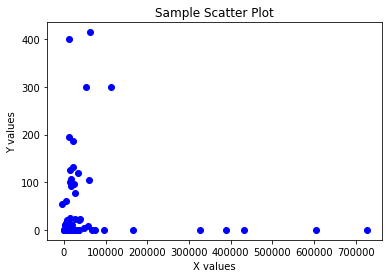

In [141]:
plt.scatter(day_4['avg_total_savings'], day_4['total_job_create'], color='blue', marker='o')

# Optionally, set the title and labels for better understanding
plt.title('Sample Scatter Plot')
plt.xlabel('X values')
plt.ylabel('Y values')

# Display the plot
plt.show()


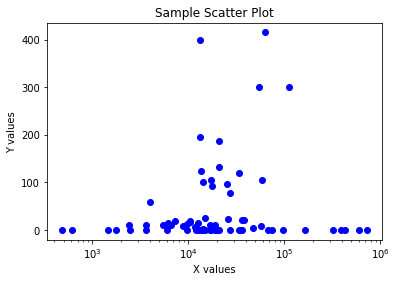

In [142]:
plt.scatter(day_4['avg_total_savings'], day_4['total_job_create'], color='blue', marker='o')

# Optionally, set the title and labels for better understanding
plt.title('Sample Scatter Plot')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.xscale('log')
# Display the plot
plt.show()

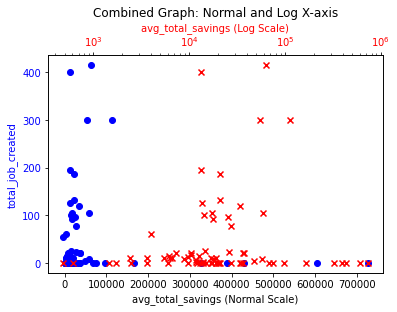

In [146]:
# Create main axis: normal scale
fig, ax1 = plt.subplots()

ax1.scatter(day_4['avg_total_savings'], day_4['total_job_create'], color='blue', marker='o')
ax1.set_title('Combined Graph: Normal and Log X-axis')
ax1.set_xlabel('avg_total_savings (Normal Scale)')
ax1.set_ylabel('total_job_created', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis: log scale
ax2 = ax1.twiny()  # twinx would be for a second y-axis, twiny is for x-axis
ax2.scatter(day_4['avg_total_savings'], day_4['total_job_create'], color='red', marker='x')
ax2.set_xlabel('avg_total_savings (Log Scale)', color='red')
ax2.set_xscale('log')
ax2.tick_params(axis='x', labelcolor='red')

# Show the plot
plt.show()

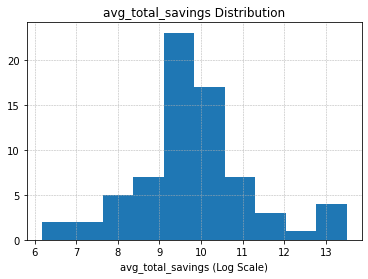

In [167]:
plt.hist(np.log(day_4['avg_total_savings']))

# Optionally, set the title, labels, and other attributes for better presentation
plt.title('avg_total_savings Distribution')
plt.xlabel('avg_total_savings (Log Scale)')
#plt.ylabel('frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

In [191]:
data['Effective_Month']=data['Effective Date'].apply(lambda x: int(str(x).split('/')[0]))

In [192]:
job_vs_month=data.groupby('Effective_Month')['Job created'].sum()

In [193]:
job_vs_month

Effective_Month
1       235.0
2       695.0
3       311.0
4       171.0
5     11470.0
6       626.0
7       199.0
8       127.0
9       440.0
10      583.0
11      257.0
12      168.0
Name: Job created, dtype: float64

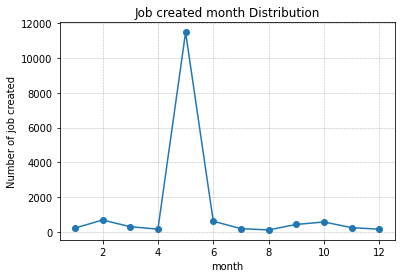

In [194]:
plt.plot(job_vs_month.index,job_vs_month.values,marker='o', linestyle='-')

# Optionally, set the title, labels, and other attributes for better presentation
plt.title('Job created month Distribution')
plt.xlabel('month')
plt.ylabel('Number of job created')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()